<a href="https://colab.research.google.com/github/iliya1984/DevML/blob/main/computer_vision/image_classification/homer_bart_classification_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homer/Bart image classification with neural network

### Importing the libraries

In [1]:
import cv2
import numpy as np
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix

from google.colab import drive
from google.colab.patches import cv2_imshow
drive.mount('/content/drive')

tf.__version__

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'2.15.0'

In [2]:
%run '/content/drive/MyDrive/Workspace/Computer Vision/cv_common.ipynb'

Common library was successfully loaded


### Loading dataset

In [3]:
zip_file_path = f'{datasets_directory}/Simpsons/simpsons.zip'
working_directory = './content/simpsons'
data_extract_path = f'{working_directory}/datasets'
train_set_path = f'{data_extract_path}/simpsons/training_set'
test_set_path = f'{data_extract_path}/simpsons/test_set'

image_height = 128
image_width = 128

In [4]:
create_empty_directory(data_extract_path)
zipe_file = zipfile.ZipFile(file=zip_file_path, mode = 'r')
zipe_file.extractall(data_extract_path)
zipe_file.close()

./content/simpsons/datasets directory already exists


### Extracting pixels from images

In [5]:
def get_labels(images):
  labels = []

  for image_info in images:
    label = image_info[2]
    labels.append(label)

  return np.asarray(labels)

def get_image_vectors(images):
  vectors = []

  for image_info in images:
    vector = image_info[1]
    vectors.append(vector)

  return np.asarray(vectors)

def load_images_and_classes(directory, images, preview_images=False):

  files = [os.path.join(directory, f) for f in sorted(os.listdir(directory))]
  #print(files)

  preview_index = 0
  for image_path in files:
    #print(image_path)
    try:
      image = cv2.imread(image_path)
      (H, W) = image.shape[:2]
    except:
      print('Image read error')
      continue

    image = cv2.resize(image, (image_width, image_height))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    if preview_images and preview_index < 1:
      cv2_imshow(image)
      preview_index += 1

    #Converting image matrix into vector
    vector = image.ravel()
    #print(image.shape)

    image_name = os.path.basename(os.path.normpath(image_path))
    if image_name.startswith('b'):
      class_name = 0
    else:
      class_name = 1

    images.append((image, vector, class_name))
    #print(class_name)

  return images

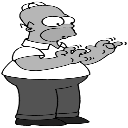

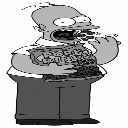

In [6]:
#Loading Homer's images and labels
train_set = load_images_and_classes(f'{train_set_path}/homer', [], preview_images=True)
test_set = load_images_and_classes(f'{test_set_path}/homer', [], preview_images=True)

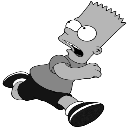

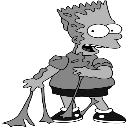

In [7]:
#Loading Bart's images and labels
train_set = load_images_and_classes(f'{train_set_path}/bart', train_set, preview_images=True)
test_set = load_images_and_classes(f'{test_set_path}/bart', test_set, preview_images=True)

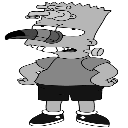

In [8]:
#Shuffling training set
random.shuffle(train_set)
cv2_imshow(train_set[0][0])


<BarContainer object of 2 artists>

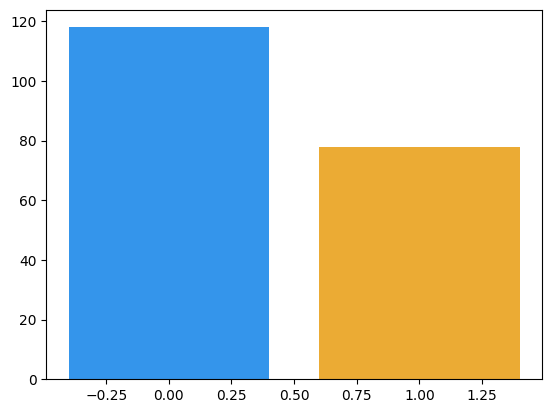

In [9]:
train_labels = get_labels(train_set)
label_counts = pd.Series(train_labels).value_counts()
plt.bar(label_counts.index.values, label_counts.values, color=['#3495eb', '#ebab34'])


### Normalizing the data

In [10]:
train_vectors = get_image_vectors(train_set)

scaler = MinMaxScaler()
train_vectors = scaler.fit_transform(train_vectors)

### Building and training the neural network

In [11]:
net = Sequential()
net.add(Dense(input_shape=(16384,), units=8193, activation='relu'))
net.add(Dense(units=8193, activation = 'relu'))
net.add(Dense(units = 1, activation = 'sigmoid'))

In [12]:
net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8193)              134242305 
                                                                 
 dense_1 (Dense)             (None, 8193)              67133442  
                                                                 
 dense_2 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201383941 (768.22 MB)
Trainable params: 201383941 (768.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# https://keras.io/api/optimizers/
# https://keras.io/api/losses/
net.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [14]:
history = net.fit(train_vectors, train_labels, epochs=40)

Epoch 1/40
7/7 [==============================] - 7s 74ms/step - loss: 160.6493 - accuracy: 0.5816
Epoch 2/40
7/7 [==============================] - 1s 72ms/step - loss: 8.4687 - accuracy: 0.6020
Epoch 3/40
7/7 [==============================] - 1s 75ms/step - loss: 1.5834 - accuracy: 0.5153
Epoch 4/40
7/7 [==============================] - 0s 69ms/step - loss: 0.8025 - accuracy: 0.5816
Epoch 5/40
7/7 [==============================] - 1s 72ms/step - loss: 0.6944 - accuracy: 0.5765
Epoch 6/40
7/7 [==============================] - 1s 75ms/step - loss: 0.6867 - accuracy: 0.6327
Epoch 7/40
7/7 [==============================] - 0s 68ms/step - loss: 0.6554 - accuracy: 0.6327
Epoch 8/40
7/7 [==============================] - 0s 71ms/step - loss: 0.6262 - accuracy: 0.6327
Epoch 9/40
7/7 [==============================] - 0s 63ms/step - loss: 0.6285 - accuracy: 0.6531
Epoch 10/40
7/7 [==============================] - 0s 70ms/step - loss: 0.6412 - accuracy: 0.6531
Epoch 11/40
7/7 [==========

### Evaluating the neural network

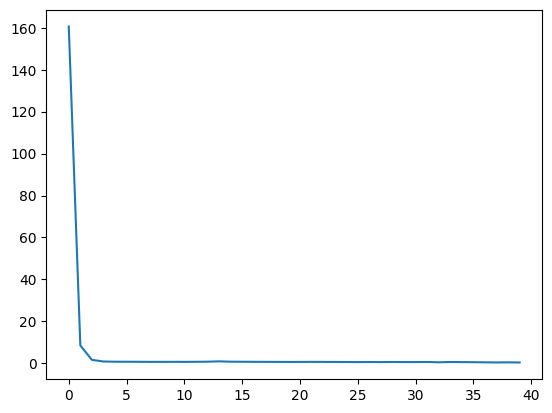

In [15]:
plt.plot(history.history['loss']);

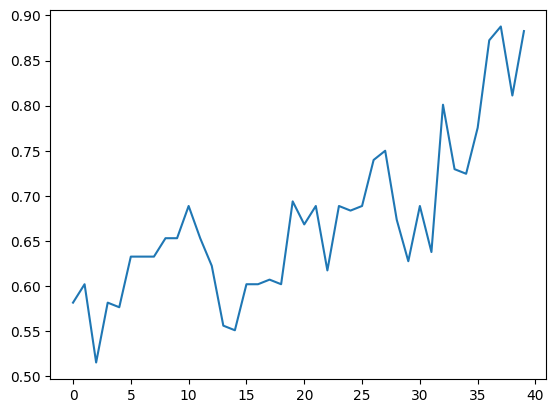

In [16]:
plt.plot(history.history['accuracy']);

In [17]:
test_labels = get_labels(test_set)
test_vectors = get_image_vectors(test_set)

In [18]:
predictions = net.predict(test_vectors)

3/3 [==============================] - 0s 6ms/step


In [19]:
predictions = (predictions > 0.5)
accuracy_score(test_labels, predictions)

0.7397260273972602

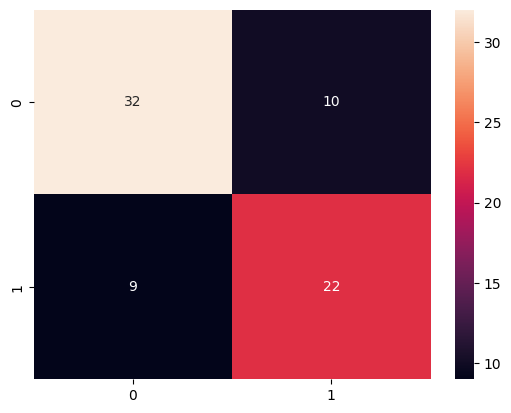

In [20]:
cm = confusion_matrix(test_labels, predictions)
sns.heatmap(cm, annot=True);